In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import os

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

* [Part1]의 6번 문제에서 graphviz 설치가 안되는 경우 colab을 이용하시면 됩니다.
* colab에서 진행하실 경우 아래 코드를 실행시켜 본인 drive와 연동을 해주시고 csv 파일을 연동한 드라이브 안에 넣어주세요.
```python
from google.colab import drive
drive.mount('/content/drive')
```

* colab에서 진행하실 경우 파일 경로는 왼쪽 폴더 파일에서 파일 위치까지 가시고 파일에 마우스 올려놓으면 옆에 점 3개 나오는데 그거 클릭 후 copy path를 누르시면 쉽게 복사가 가능합니다.

## [Part 1] Decision Tree를 사용한 분류 문제입니다.
- data: play_tennis.csv
- 날씨(outlook), 온도, 습도, 바람의 세기의 정보 조합으로 테니스를 칠 수 있을지에 관한 데이터

### 1. play_tennis.csv를 tennis로 가져와 첫 5행과 개괄적 데이터 타입을 확인하시오.

In [2]:
pt=pd.read_csv("play_tennis.csv")

In [3]:
pt.head()

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


### 1.2 데이터의 outlook 카테고리를 unique로 살펴보시오.

In [4]:
pt['outlook'].unique()

array(['Sunny', 'Overcast', 'Rain'], dtype=object)

### 2. day 칼럼을 삭제하시오

In [5]:
pt.drop(['day'],axis=1,inplace=True)

### 3. 모든 변수를 LableEncoder를 사용하여 인코딩하고, 이후 잘 되었는지 확인하시오.
데이터가 object의 범주형 변수이므로 인코딩이 필요합니다.  
cf. LableEncoder는 객체로 선언하여 fit_transform()을 호출하여 레이블 인코딩을 수행합니다. 

다른 인코딩으로 진행하여도 무관합니다.

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
pt['outlook'] = le.fit_transform(pt['outlook'])
pt['humidity'] = le.fit_transform(pt['humidity'])
pt['temp'] = le.fit_transform(pt['temp'])
pt['wind'] = le.fit_transform(pt['wind'])
pt['play'] = le.fit_transform(pt['play'])

In [7]:
pt.head()

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [8]:
pt['outlook'].unique()

array([2, 0, 1])

### 4. play를 타깃 데이터인 y로, 나머지를 X 변수에 저장하고 train/test data로 나누시오.
- test_size=0.3
- random_state=52

In [9]:
X_features=pt.drop(['play'],axis=1)
y_target=pt['play']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_features,y_target,test_size = 0.3,random_state=52)

### 5-1. 결정 트리(CART 알고리즘)를 사용하여 훈련 데이터를 fit하시오. 또한 테스트 데이터에 대해서 예측을 진행해보고 예측의 정확도를 출력하시오.

* max_depth = 3
* 예측 시에는 predict_proba 혹은 predict 함수를 사용할 것
* 예측의 정확도는 score 함수를 사용하여 구할 것.

In [11]:
tc=DecisionTreeClassifier(max_depth = 3,criterion='gini')
tc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [12]:
print(tc.predict(X_test))
print(tc.score(X_test,y_test))

[1 0 0 0 0]
0.4


### 5-2. 결정 트리(ID3 알고리즘)를 사용하여 훈련 데이터를 fit하시오. 또한 테스트 데이터에 대해서 예측을 진행해보고 예측의 정확도를 출력하시오.

* max_depth = 3 
* 예측 시에는 predict_proba 혹은 predict 함수를 사용할 것
* 예측의 정확도는 score 함수를 사용하여 구할 것.

In [13]:
tcid=DecisionTreeClassifier(max_depth = 3,criterion='entropy')
tcid.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [14]:
print(tcid.predict(X_test))
print(tcid.score(X_test,y_test))

[0 0 1 0 0]
0.4


### 6. graphviz를 사용하여 시각화를 진행하시오.

In [15]:
#해당 코드를 실행
from sklearn.tree import export_graphviz
feature_names =pt.columns.tolist()
feature_names = feature_names[0:4]
target_name = np.array(['Play No', 'Play Yes'])

* 5-1에서 만든 결정 트리(CART)를 시각화하시오.
- 출력 코드 예시(다른 코드로 진행해도 무관함)

```python
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
```

- [graphviz 설치에 오류를 겪는다면 여기로](https://free-eunb.tistory.com/14)

In [16]:
export_graphviz(
        tc,
        out_file=os.path.join(IMAGES_PATH, "tree.dot"),
        rounded=True,
        filled=True)

In [17]:
# import graphviz에서 설치되지 않았다는 오류가 등장한다면,
# pip install graphviz 코드를 사용하여 먼저 graphviz를 설치하세요.

In [18]:
Source.from_file(os.path.join(IMAGES_PATH, "tree.dot"))

NameError: name 'Source' is not defined

`Bonus!` 결정 트리에서 깊이 1의 오른쪽 노드의 지니 계수를 실제로 계산해보고, 그 값을 트리의 값과 비교하시오.

In [19]:
1-(1/5)**2-(4/5)**2

0.31999999999999984

* 5-2에서 만든 결정트리(ID3)를 시각화하시오.

In [20]:
export_graphviz(
        tcid,
        out_file=os.path.join(IMAGES_PATH, "tree.dot_id"),
        rounded=True,
        filled=True)

In [21]:
Source.from_file(os.path.join(IMAGES_PATH, "tree.dot_id"))

NameError: name 'Source' is not defined

## [Part 2] Decision Tree를 사용한 회귀 문제입니다.
- data: 임의의 2차식으로 만든 데이터셋 + 잡음

### 아래 코드를 그대로 실행하여 data 생성하기

In [22]:
np.random.seed(1)
m = 200
X = np.random.rand(m, 1)
y = 6 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

## max_leaf_nodes 규제 파라미터 실습
- max_leaf_nodes는 리프 노드의 최대 수를 규제하는 파라미터이다

### 1. 사이킷런의 DecisionTreeRegressor를 사용하여 데이터를 두가지 다른 parameter로 fit 하시오.
#### 첫번째 parameter: 
- 모델명= tree_reg_1, max_leaf_nodes=50, random_state=1 

#### 두번째 parameter: 
- 모델명= tree_reg_2, max_leaf_nodes=10, random_state=1

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_1 = DecisionTreeRegressor(max_leaf_nodes=50, random_state=1)
tree_reg_1.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=50, random_state=1)

In [24]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_2 = DecisionTreeRegressor(max_leaf_nodes=10, random_state=1)
tree_reg_2.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=10, random_state=1)

### 2. 다음 코드를 그대로 실행시켜 위에서 만든 두가지 모델을 시각화한 후, 어느 모델이 더 적절한 회귀를 했는지 판단하시오.

그림 저장: tree_regression_plot


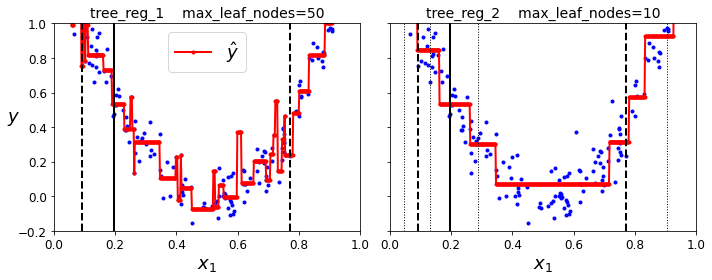

In [25]:
def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg_1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)

plt.legend(loc="upper center", fontsize=18)
plt.title("tree_reg_1    max_leaf_nodes=50", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg_2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)

plt.title("tree_reg_2    max_leaf_nodes=10", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

#### Q: tree_reg_1과 tree_reg_2 중 어느 모델이 더 좋은 회귀 모델이며, 그 이유를 말하시오.

답: 오른쪽. 왼쪽은 너무 과대적합되어 보임. 

## min_samples_split 규제 파라미터 실습

### 3. 사이킷런의 DecisionTreeRegressor를 사용하여 데이터를 두가지 다른 parameter로 fit 하시오.
#### 첫번째 parameter: 
- 모델명= tree_reg_3, min_samples_split=25, random_state=1 

#### 두번째 parameter: 
- 모델명= tree_reg_4, min_samples_split=2, random_state=1

In [26]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_3 = DecisionTreeRegressor(min_samples_split=25, random_state=1)
tree_reg_3.fit(X, y)

DecisionTreeRegressor(min_samples_split=25, random_state=1)

In [27]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_4 = DecisionTreeRegressor(min_samples_split=2, random_state=1)
tree_reg_4.fit(X, y)

DecisionTreeRegressor(random_state=1)

### 4. 다음 코드를 그대로 실행시켜 위에서 만든 두가지 모델을 시각화한 후, 어느 모델이 더 적절한 회귀를 했는지 판단하시오.

그림 저장: tree_regression_plot


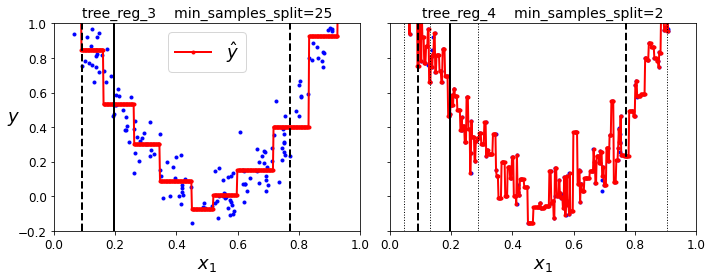

In [28]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg_3, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)

plt.legend(loc="upper center", fontsize=18)
plt.title("tree_reg_3    min_samples_split=25", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg_4, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)

plt.title("tree_reg_4    min_samples_split=2", fontsize=14)

save_fig("tree_regression_plot")
plt.show()

#### Q: tree_reg_3과 tree_reg_4 중 어느 모델이 더 좋은 회귀 모델이며, 그 이유를 말하시오.

답: 왼쪽. 왜냐하면 오른쪽은 과대적합.

### 5-1. GridSearchCV를 이용하여 최적의 하이퍼 파라미터 조합을 찾으시오.

* cv = 5, params_grid=params, scoring='neg_mean_squared_error'

```python
params = {
    "max_depth":[2, 3, 4, 5, 6, 7],
    "max_leaf_nodes":[2, 3, 4, 5, 6, 7],
    "min_samples_split":[2, 3, 4, 5, 6, 7]
}
```

In [29]:
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth":[2, 3, 4, 5, 6, 7],
    "max_leaf_nodes":[2, 3, 4, 5, 6, 7],
    "min_samples_split":[2, 3, 4, 5, 6, 7]
}
grid_search = GridSearchCV(DecisionTreeRegressor(), cv = 5, params_grid=params, scoring='neg_mean_squared_error') 
grid_search.fit(X_test, y_test)

TypeError: __init__() got an unexpected keyword argument 'params_grid'

### 5-2. Best parameter와 Best score를 출력하라. 

In [30]:
grid_search.best_params_

NameError: name 'grid_search' is not defined

In [31]:
grid_search.best_score_

NameError: name 'grid_search' is not defined

### 5-3. 5-2의 Best score를 이용해 RMSE를 구하라.

* GridSearchCV에서 scoring='neg_mean_squared_error'을 사용하였기 때문에 부호를 바꿔주는 과정이 필요함.

In [32]:
np.sqrt(-grid_search.best_score_)

NameError: name 'grid_search' is not defined